In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno # for missing values

#for date time manipulation
import datetime

#for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
# setting style for plots
plt.style.use('fivethirtyeight')

In [2]:
#read data & check  computation time
%time data = pd.read_csv('Data.csv')
data

Wall time: 185 ms


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
data.shape

(18207, 89)

In [4]:
# columns present in data

data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
# check first 5 rows and column
pd.set_option('max_columns',100)
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# describe data for numerical columns
pd.set_option('max_columns',100)
data.iloc[:,2:].describe().style.background_gradient(cmap='cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
# check descriptive statistics for categorical columns
data.iloc[:,13:].describe(include='object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


# Cleaning data

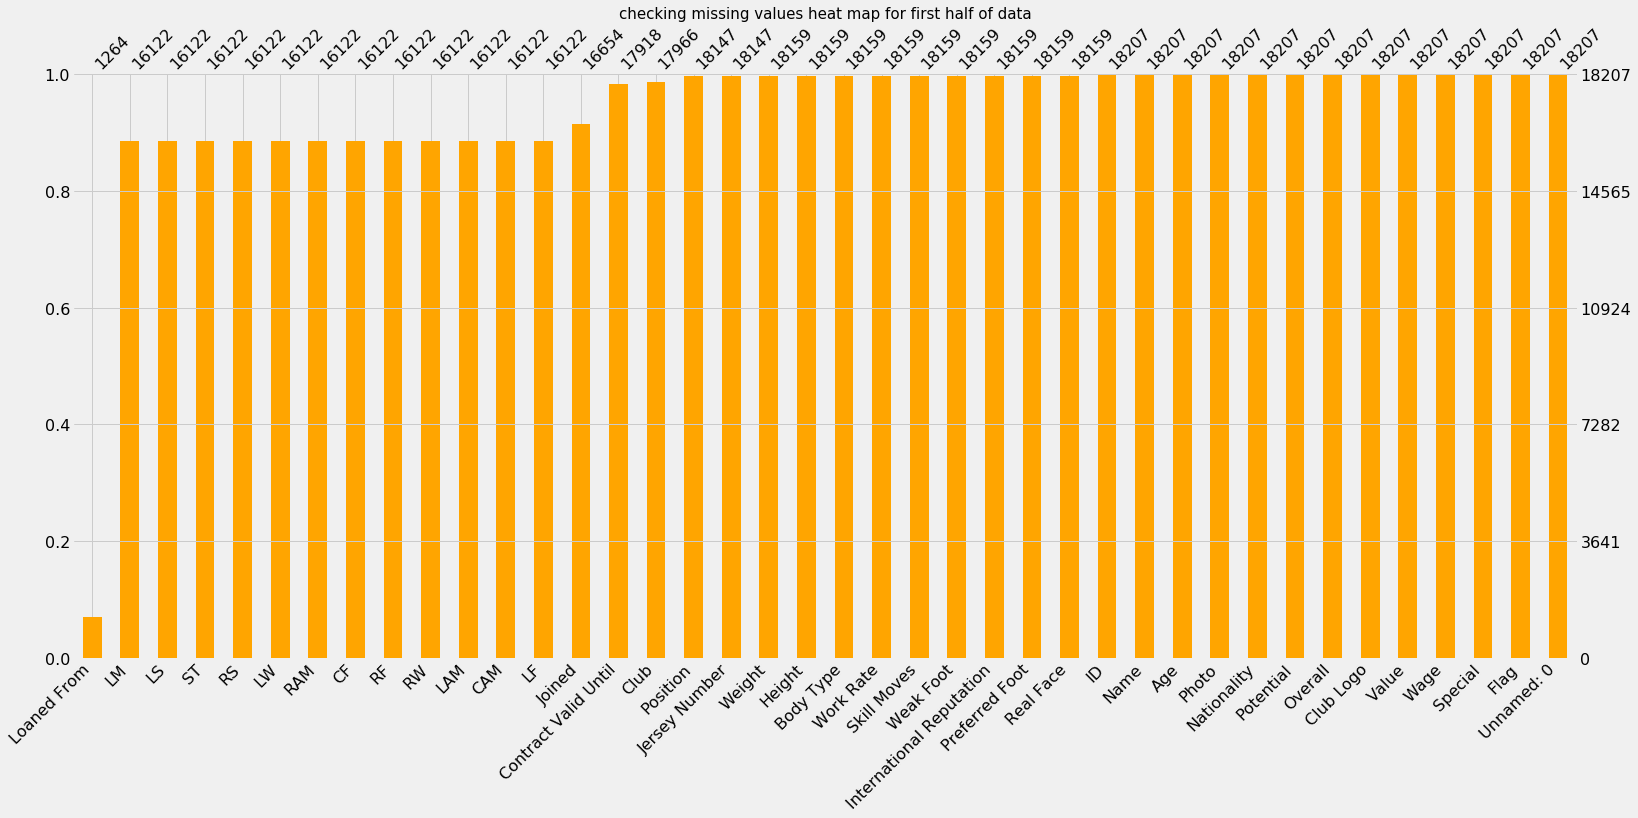

In [8]:
#to check if data has null values
# visualize missing values as matrix
mno.bar(data.iloc[:,:40],color='orange',sort='ascending')
plt.title("checking missing values heat map for first half of data",fontsize=15)
plt.show()

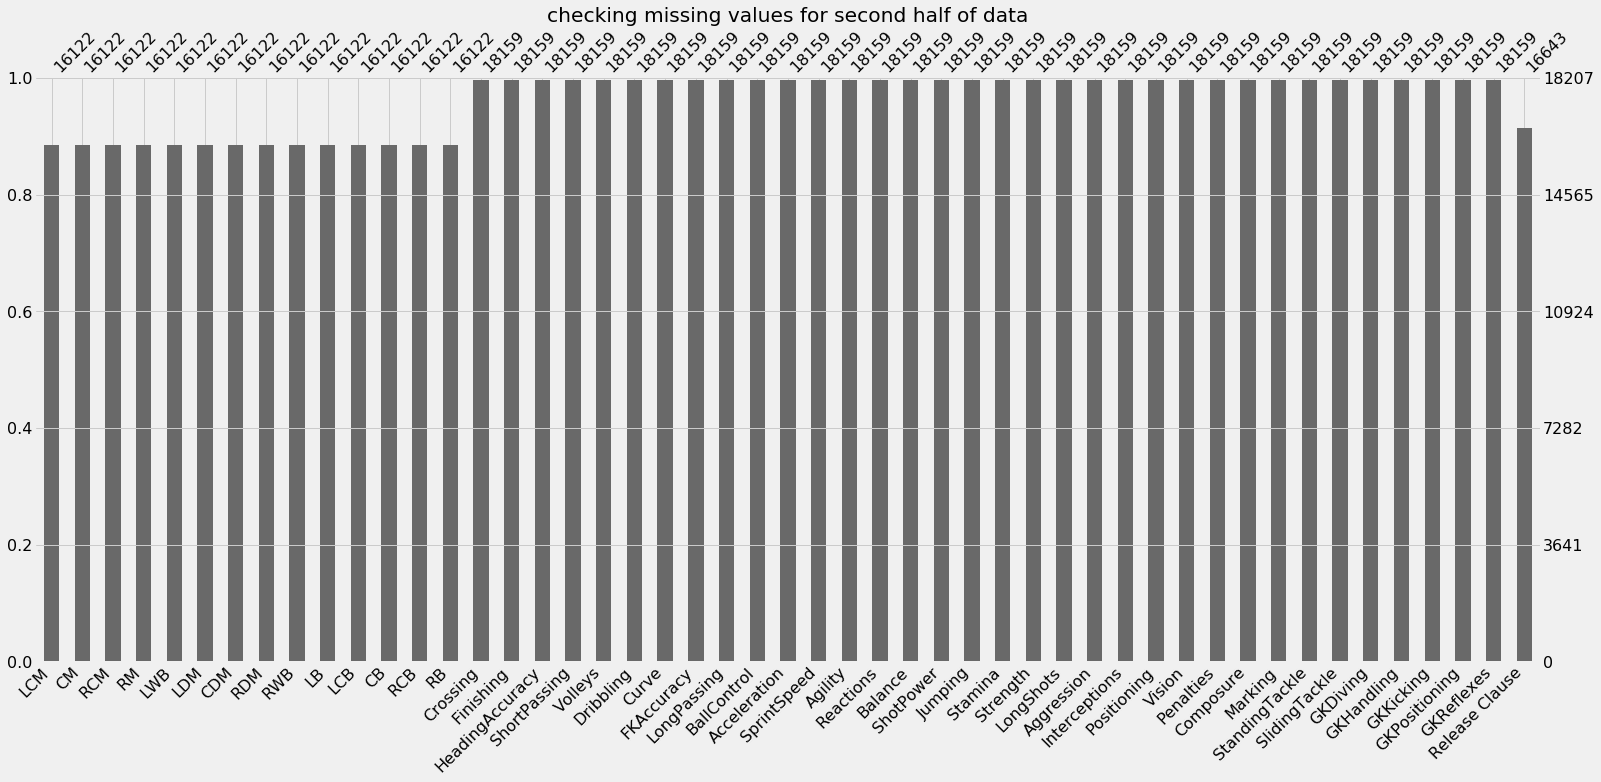

In [9]:
# second half of data
mno.bar(data.iloc[:,40:])
plt.title("checking missing values for second half of data")
plt.show()

# Missing values imputation

In [10]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [11]:
# filling missing values for the continuous variables for proper data visuaization
data['ShortPassing'].fillna(data['ShortPassing'].mean(),inplace=True)
data['Volleys'].fillna(data['Volleys'].mean(),inplace=True)
data['Dribbling'].fillna(data['Dribbling'].mean(),inplace=True)
data['ShortPassing'].fillna(data['ShortPassing'].mean(),inplace=True)
data['Curve'].fillna(data['Curve'].mean(),inplace=True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(),inplace=True)
data['LongPassing'].fillna(data['LongPassing'].mean(),inplace=True)
data['BallControl'].fillna(data['BallControl'].mean(),inplace=True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(),inplace=True)
data['Finishing'].fillna(data['Finishing'].mean(),inplace=True)
data['Crossing'].fillna(data['Crossing'].mean(),inplace=True)
data['Weight'].fillna('200lbs',inplace=True)
data['Contract Valid Until'].fillna(2019,inplace=True)
data['Height'].fillna("5'11",inplace=True)
data['Loaned From'].fillna('None',inplace=True)
data['Joined'].fillna('Jul 1, 2018',inplace=True)
data['Jersey Number'].fillna(8,inplace=True)
data['Body Type'].fillna('Normal',inplace=True)
data['Position'].fillna('ST',inplace=True)
data['Club'].fillna('No Club',inplace=True)
data['Work Rate'].fillna('Medium/ Medium',inplace=True)
data['Skill Moves'].fillna(data['Skill Moves'].median(),inplace=True)
data['Weak Foot'].fillna(3,inplace=True)
data['Preferred Foot'].fillna('Right',inplace=True)
data['International Reputation'].fillna(1,inplace=True)
data['Wage'].fillna('€200K',inplace=True)
data.fillna(0,inplace=True)



#check if data still has missing values
data.isnull().sum().sum()

0

# Feature Engineering

In [12]:
#creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking','StandingTackle','SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy','Dribbling','Curve','BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing','ShortPassing','LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration','SprintSpeed','Agility','Reactions']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential','Overall']].mean()).mean()))

def power(data):
    return int(round((data[['Balance','Jumping','Stamina','Strength']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing','Volleys','FKAccuracy','ShotPower','LongShots','Penalties']].mean()).mean()))

In [13]:
#adding these categories to data
data['Defending']=data.apply(defending,axis=1)
data['General']=data.apply(general,axis=1)
data['Mental']=data.apply(mental,axis=1)
data['Passing']=data.apply(passing,axis=1)
data['Mobility']=data.apply(mobility,axis=1)
data['Rating']=data.apply(rating,axis=1)
data['Power']=data.apply(power,axis=1)
data['Shooting']=data.apply(shooting,axis=1)

In [16]:
# check column names after adding 

data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# Data Visualization

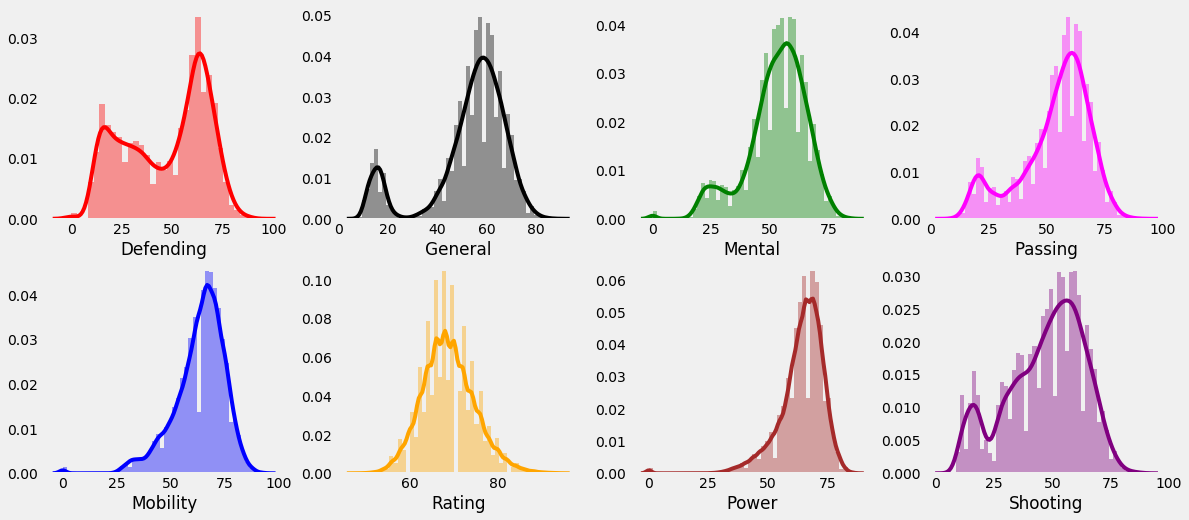

In [17]:
#check distribution of scores of different skills
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,1)
sns.distplot(data['Defending'],color='red')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['General'],color='black')
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['Mental'],color='green')
plt.grid()


plt.subplot(2,4,4)
sns.distplot(data['Passing'],color='magenta')
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['Mobility'],color='blue')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['Rating'],color='orange')
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['Power'],color='brown')
plt.grid()

plt.subplot(2,4,8)
sns.distplot(data['Shooting'],color='purple')
plt.grid()

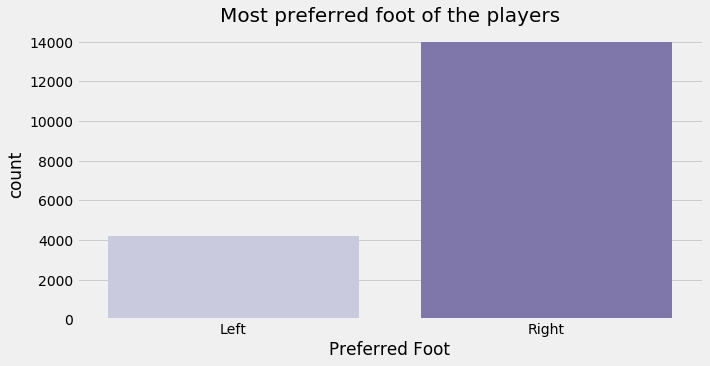

In [18]:
# comparison of preferred foot over different players
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(data['Preferred Foot'],palette='Purples')
plt.title("Most preferred foot of the players",fontsize=20)
plt.show()

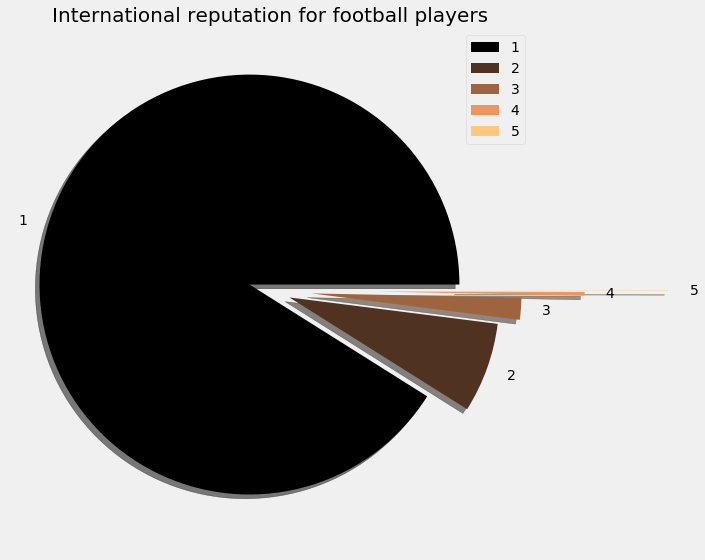

In [19]:
# pie chart to represent share of  international reputation

labels = ['1','2','3','4','5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode=[0.1,0.1,0.2,0.5,0.9]

plt.rcParams['figure.figsize']=(9,9)
plt.pie(sizes,labels = labels,colors=colors,explode=explode,shadow=True)
plt.title("International reputation for football players",fontsize=20)
plt.legend()
plt.show()



In [20]:
# players who have 5 star ir
data[data['International Reputation']==5][['Name','Nationality','Overall']].sort_values(by='Overall',
                                        ascending = False).style.background_gradient(cmap='magma')

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


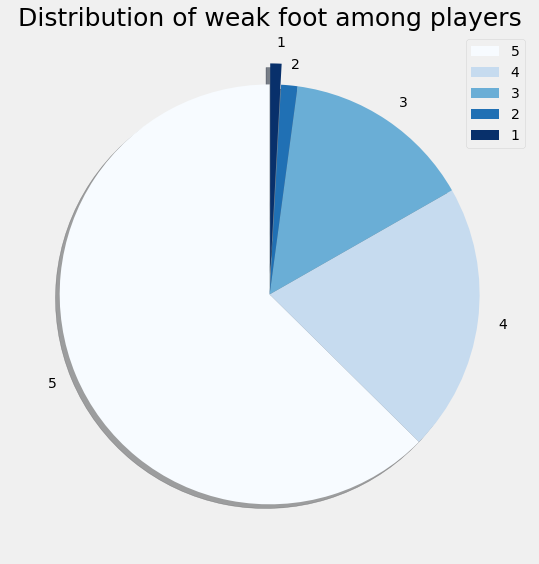

In [21]:
# pie chart to show the share of weak foot players

labels = ['5','4','3','2','1']
size = data['Weak Foot'].value_counts()
colors = plt.cm.Blues(np.linspace(0,1,5))
explode=[0,0,0,0,0.1]

plt.pie(size,labels = labels,colors=colors,explode=explode,shadow=True,startangle =90)
plt.title("Distribution of weak foot among players",fontsize=25)
plt.legend()
plt.show()

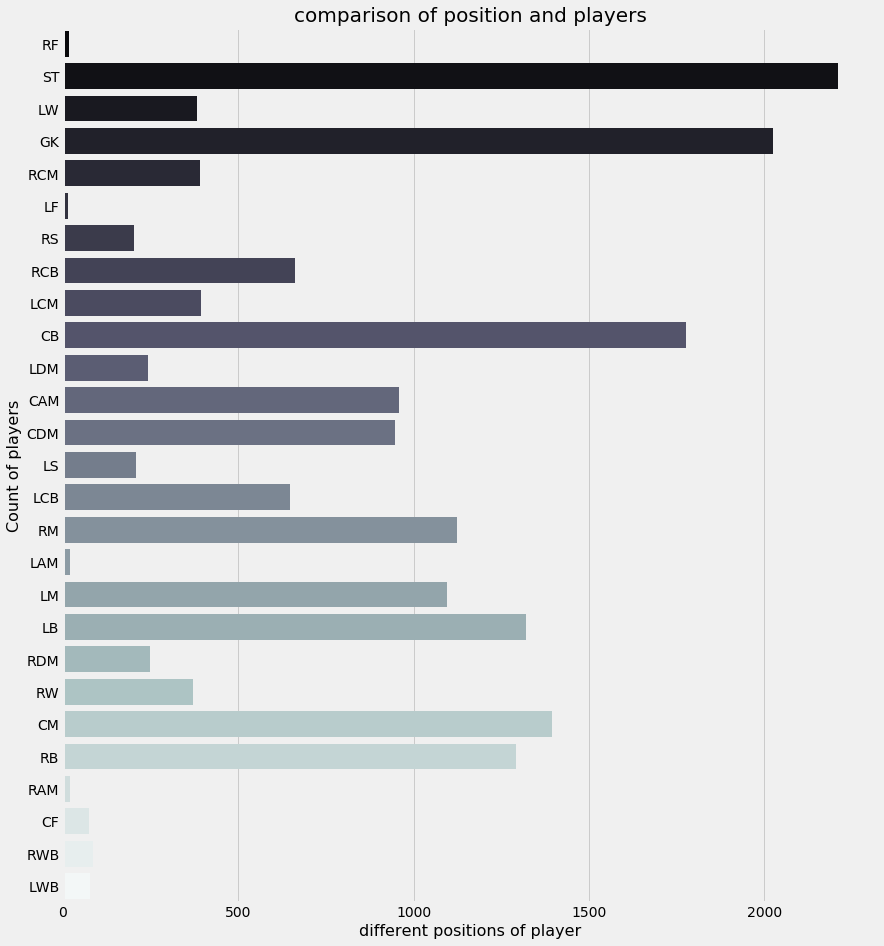

In [22]:
# Different positions acquired by players
plt.figure(figsize=(13,15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position',data = data, palette = 'bone')
ax.set_xlabel(xlabel = "different positions of player",fontsize=16)
ax.set_ylabel(ylabel = "Count of players",fontsize = 16)
ax.set_title(label = "comparison of position and players",fontsize=20)
plt.show()

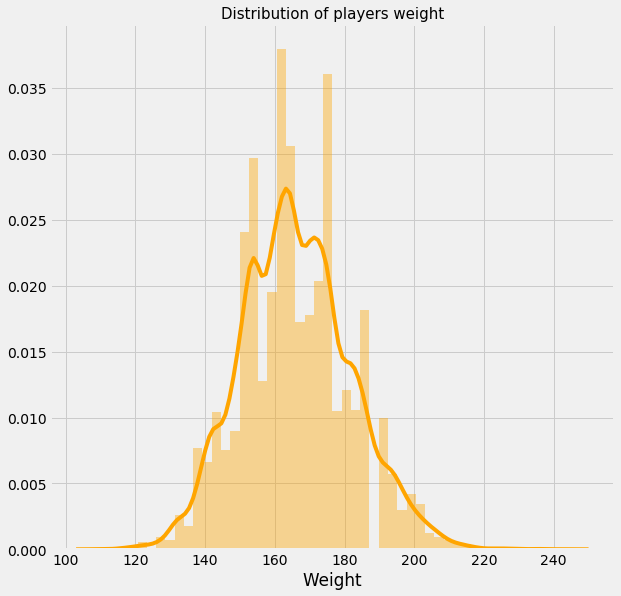

In [23]:
# defining a function for cleaning weight data
def extract_value_from(value):
    Out = value.replace('lbs','')
    return float(Out)

# applying function to weight column
data['Weight'] = data['Weight'].apply(lambda x: extract_value_from(x))

#plot dist of weight of players

sns.distplot(data['Weight'],color='orange')
plt.title("Distribution of players weight",fontsize=15)
plt.show()
    

In [24]:
# distribution of wages of players
# define function for cleaning wage column

def extract_value_from(column):
    out = column.replace('€','')
    if 'M' in out :
        out = float(out.replace('M',''))*1000000
    elif 'K' in column:
         out = float(out.replace('K',''))*1000
    return float(out)

In [25]:
#apply function to wage and value column
data['Value'] = data['Value'].apply(lambda x : extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x : extract_value_from(x))

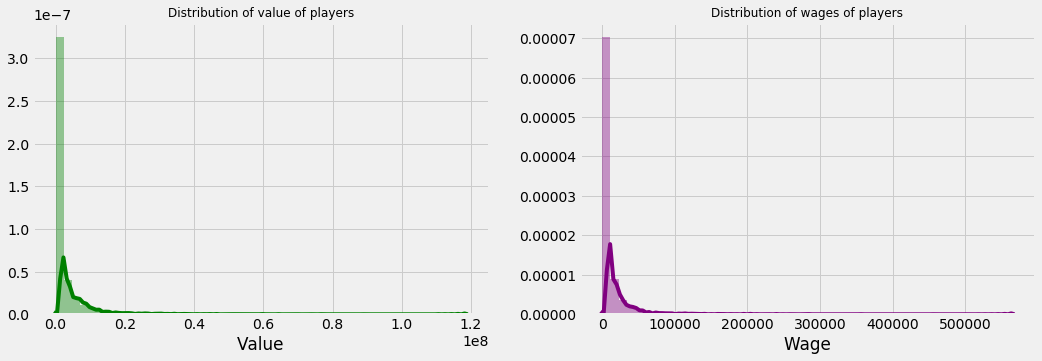

In [26]:
# visualize data

plt.rcParams['figure.figsize']=(16,5)
plt.subplot(1,2,1)
sns.distplot(data['Value'],color='green')
plt.title("Distribution of value of players",fontsize=12)

plt.subplot(1,2,2)
sns.distplot(data['Wage'],color='purple')
plt.title("Distribution of wages of players",fontsize=12)
plt.show()

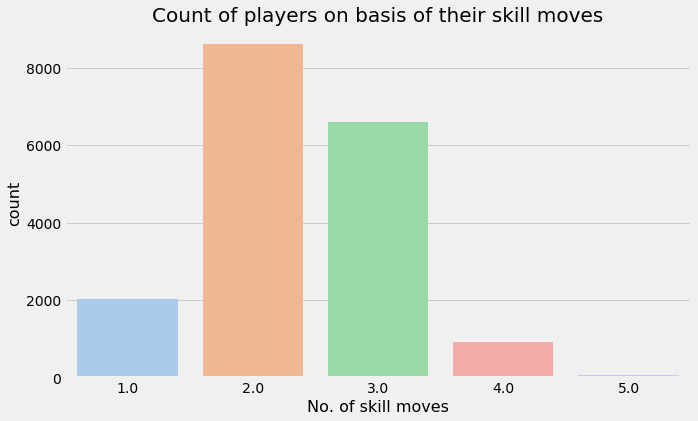

In [27]:
# skill moves of players
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Skill Moves',data = data, palette = 'pastel')
ax.set_title(label = "Count of players on basis of their skill moves",fontsize=20)
ax.set_xlabel(xlabel = "No. of skill moves",fontsize = 16)
ax.set_ylabel(ylabel = "count",fontsize=16)
plt.show()

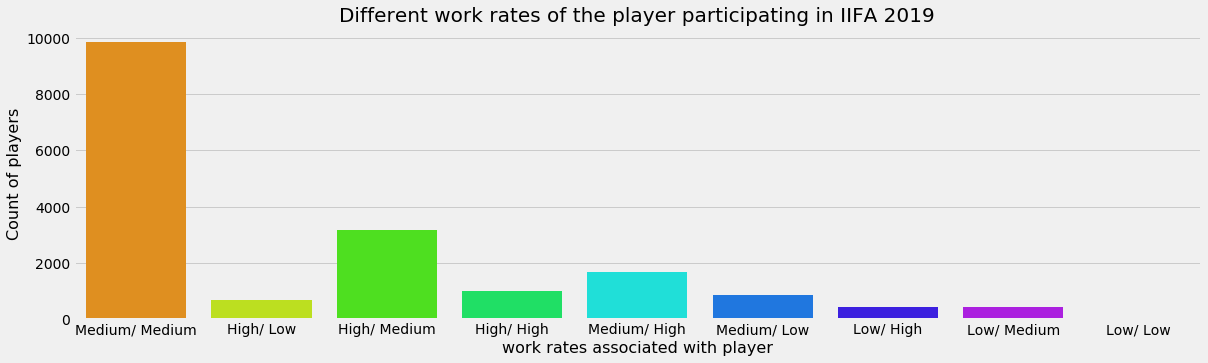

In [28]:
# show diffrent work rate of the players participating in FIFA 2019
plt.figure(figsize=(18,5))
plt.style.use('fivethirtyeight')
sns.countplot(x = 'Work Rate',data = data, palette = 'hsv')
plt.xlabel("work rates associated with player",fontsize=16)
plt.ylabel("Count of players",fontsize = 16)
plt.title( "Different work rates of the player participating in IIFA 2019",fontsize=20)
plt.show()


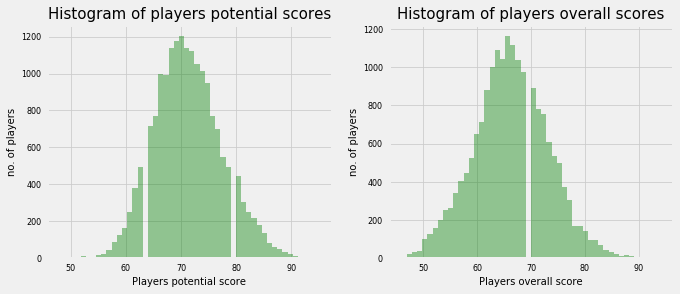

In [29]:
#show diffrent potential scores of the players participating in FIFA 2019
plt.figure(figsize=(10,4))
plt.style.use('seaborn-paper')
plt.subplot(1,2,1)
x = data.Potential
ax = sns.distplot(x,bins=50,kde=False,color='green')
ax.set_title(label = "Histogram of players potential scores",fontsize=15)
ax.set_xlabel(xlabel = "Players potential score",fontsize = 10)
ax.set_ylabel(ylabel = "no. of players",fontsize=10)



plt.subplot(1,2,2)
y = data.Overall
ax = sns.distplot(y,bins=50,kde=False,color='green')
ax.set_title(label = "Histogram of players overall scores",fontsize=15)
ax.set_xlabel(xlabel = "Players overall score",fontsize = 10)
ax.set_ylabel(ylabel = "no. of players",fontsize=10)
plt.show()

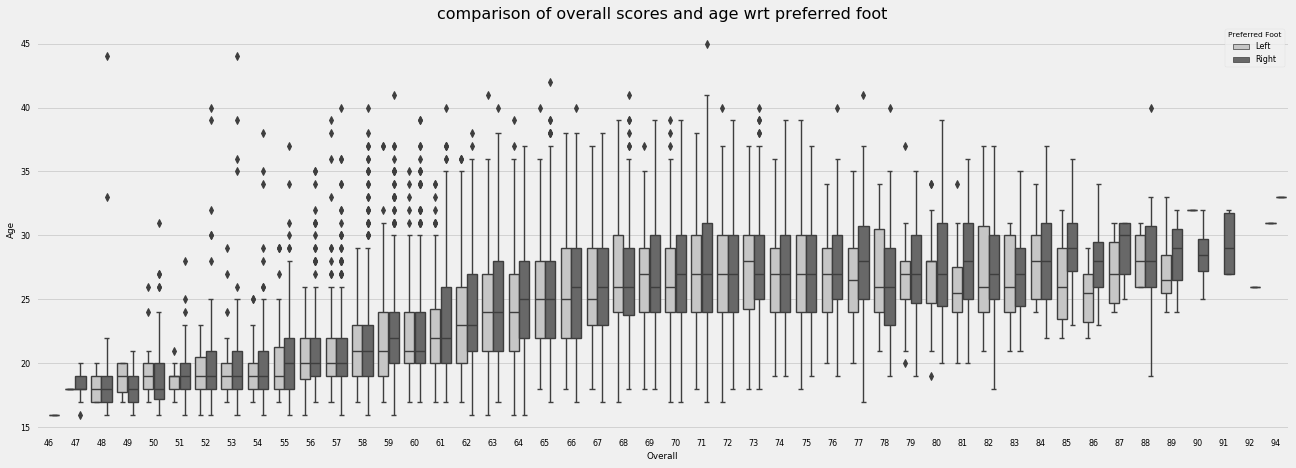

In [30]:
# violin plot
plt.figure(figsize=(20,7))
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'],data['Age'],hue=data['Preferred Foot'],palette='Greys')
plt.title('comparison of overall scores and age wrt preferred foot',fontsize=16)
plt.show()

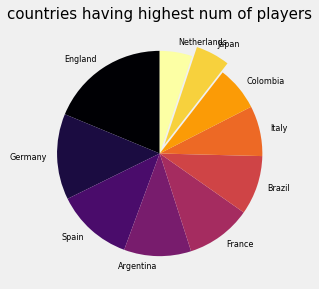

In [31]:
# countries with most playes 
#picking up countires with highest no. of playes to compare their overall scores

data['Nationality'].value_counts().head(10).plot(kind ='pie',cmap='inferno',startangle=90,explode=[0,0,0,0,0,0,0,0,0.1,0])
plt.title("countries having highest num of players",fontsize=15)
plt.axis('off')
plt.show()


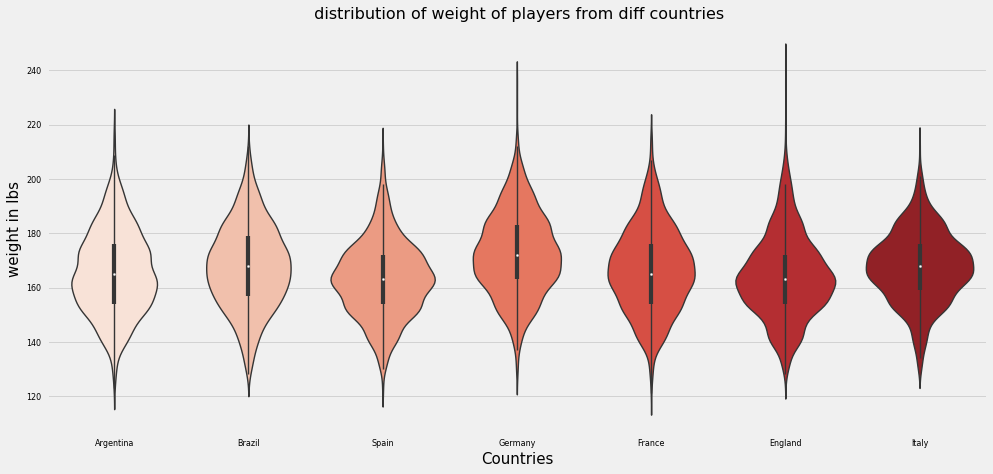

In [32]:
#every nations and their weights

some_countries = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries)& data['Weight']]

plt.rcParams['figure.figsize']=(15,7)
ax = sns.violinplot(x = data_countries['Nationality'],y = data_countries['Weight'],palette='Reds')
ax.set_xlabel(xlabel = "Countries",fontsize=15)
ax.set_ylabel(ylabel ="weight in lbs",fontsize=15)
ax.set_title(label = " distribution of weight of players from diff countries",fontsize=16)
plt.show()

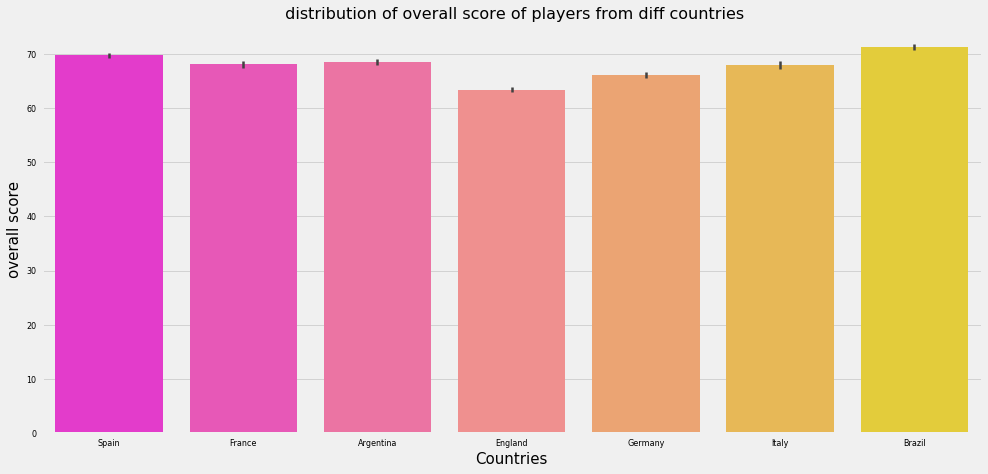

In [33]:
# every nations player and overall score
some_countries = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries)& data['Overall']]

plt.rcParams['figure.figsize']=(15,7)
ax = sns.barplot(x = data_countries['Nationality'],y = data_countries['Overall'],palette='spring')
ax.set_xlabel(xlabel = "Countries",fontsize=15)
ax.set_ylabel(ylabel ="overall score",fontsize=15)
ax.set_title(label = " distribution of overall score of players from diff countries",fontsize=16)
plt.show()

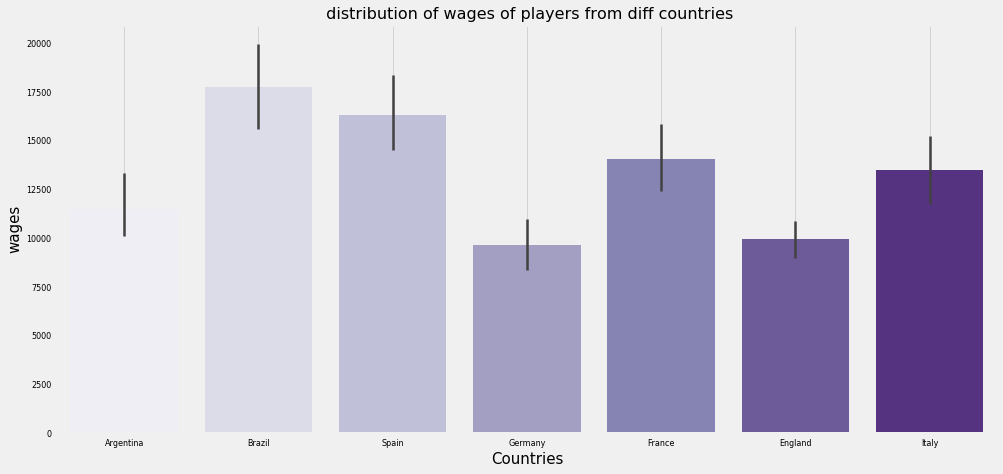

In [34]:
# every nations player and their wages
some_countries = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries)& data['Wage']]

plt.rcParams['figure.figsize']=(15,7)
ax = sns.barplot(x = data_countries['Nationality'],y = data_countries['Wage'],palette='Purples')
ax.set_xlabel(xlabel = "Countries",fontsize=15)
ax.set_ylabel(ylabel ="wages",fontsize=15)
ax.set_title(label = " distribution of wages of players from diff countries",fontsize=16)
plt.grid()
plt.show()

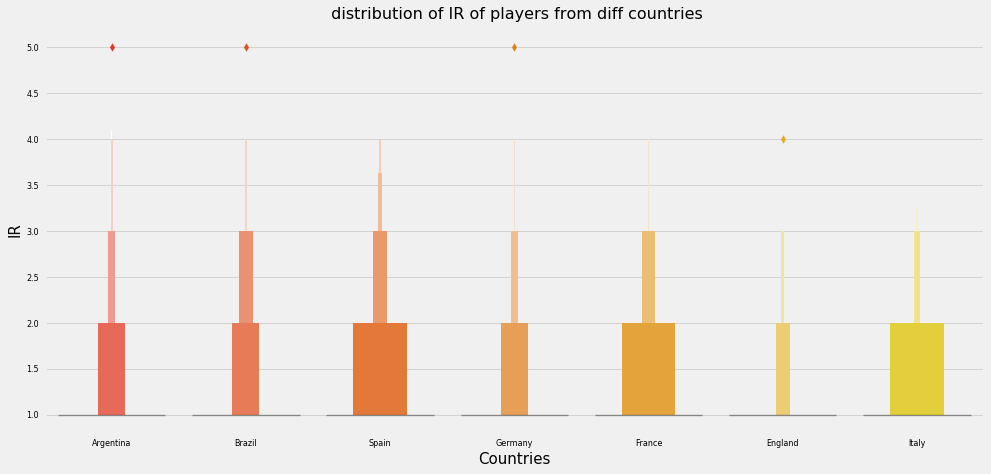

In [35]:
# every nations player and their international reputation
some_countries = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries)& data['International Reputation']]

plt.rcParams['figure.figsize']=(15,7)
ax = sns.boxenplot(x = data_countries['Nationality'],y = data_countries['International Reputation'],palette='autumn')
ax.set_xlabel(xlabel = "Countries",fontsize=15)
ax.set_ylabel(ylabel ="IR",fontsize=15)
ax.set_title(label = " distribution of IR of players from diff countries",fontsize=16)
plt.show()

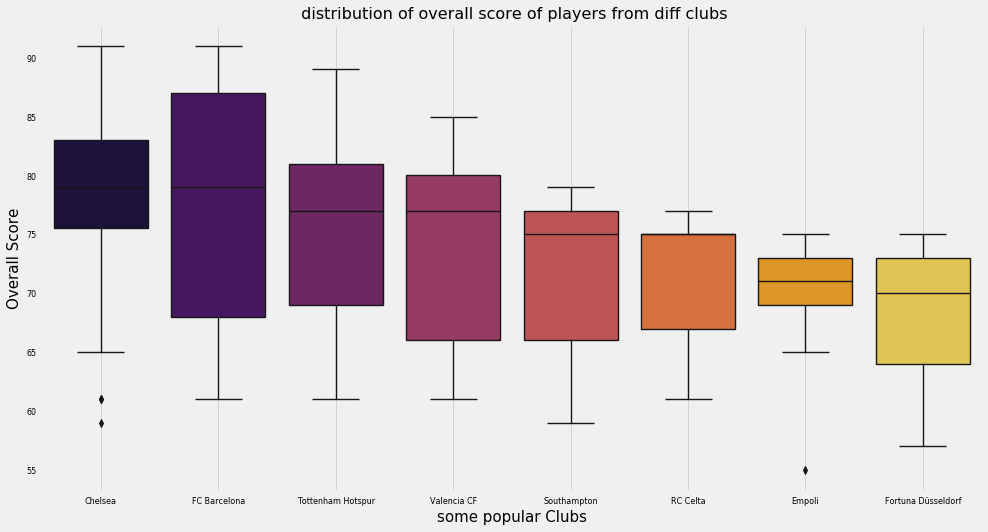

In [39]:
# distribution of overall in some popular clubs

some_clubs = ['CD leganès','Southampton','RC Celta','Empoli','Fortuna Düsseldorf','Manchestar City',
             'Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','real Madrid']
data_club = data.loc[data['Club'].isin(some_clubs)& data['Overall']]

plt.rcParams['figure.figsize']=(15,8)
ax = sns.boxplot(x = data_club['Club'],y = data_club['Overall'],palette='inferno')
ax.set_xlabel(xlabel = "some popular Clubs",fontsize=15)
ax.set_ylabel(ylabel ="Overall Score",fontsize=15)
ax.set_title(label = " distribution of overall score of players from diff clubs",fontsize=16)
plt.grid()
plt.show()

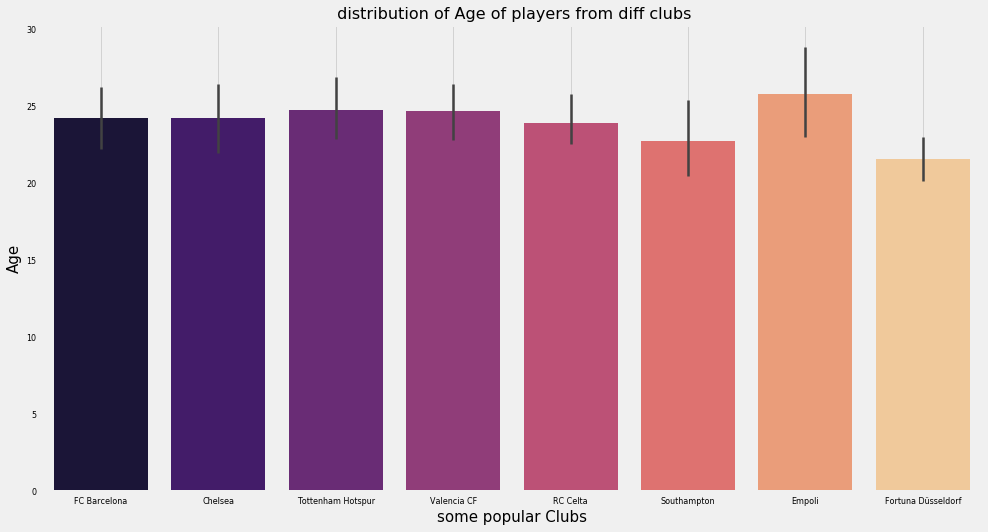

In [45]:
# age vs clubs
some_clubs = ['CD leganès','Southampton','RC Celta','Empoli','Fortuna Düsseldorf','Manchestar City',
             'Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','real Madrid']
data_club = data.loc[data['Club'].isin(some_clubs)& data['Age']]

plt.rcParams['figure.figsize']=(15,8)
ax = sns.barplot(x =data_club['Club'],y = data_club['Age'],palette='magma')
ax.set_xlabel(xlabel = "some popular Clubs",fontsize=15)
ax.set_ylabel(ylabel ="Age",fontsize=15)
ax.set_title(label = " distribution of Age of players from diff clubs",fontsize=16)
plt.grid()
plt.show()

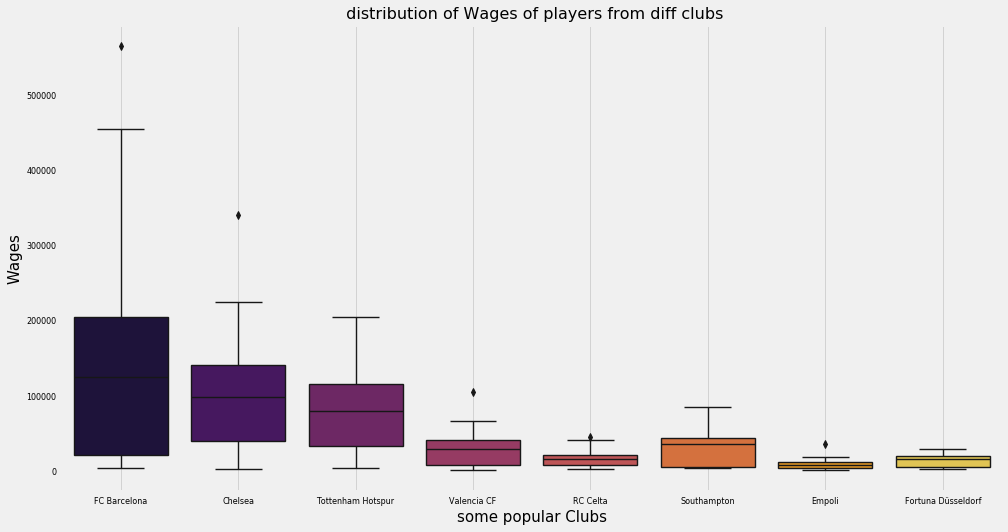

In [48]:
some_clubs = ['CD leganès','Southampton','RC Celta','Empoli','Fortuna Düsseldorf','Manchestar City',
             'Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','real Madrid']
data_club = data.loc[data['Club'].isin(some_clubs)& data['Wage']]

plt.rcParams['figure.figsize']=(15,8)
ax = sns.boxplot(x = data_club['Club'],y = data_club['Wage'],palette='inferno')
ax.set_xlabel(xlabel = "some popular Clubs",fontsize=15)
ax.set_ylabel(ylabel ="Wages",fontsize=15)
ax.set_title(label = " distribution of Wages of players from diff clubs",fontsize=16)
plt.grid()
plt.show()

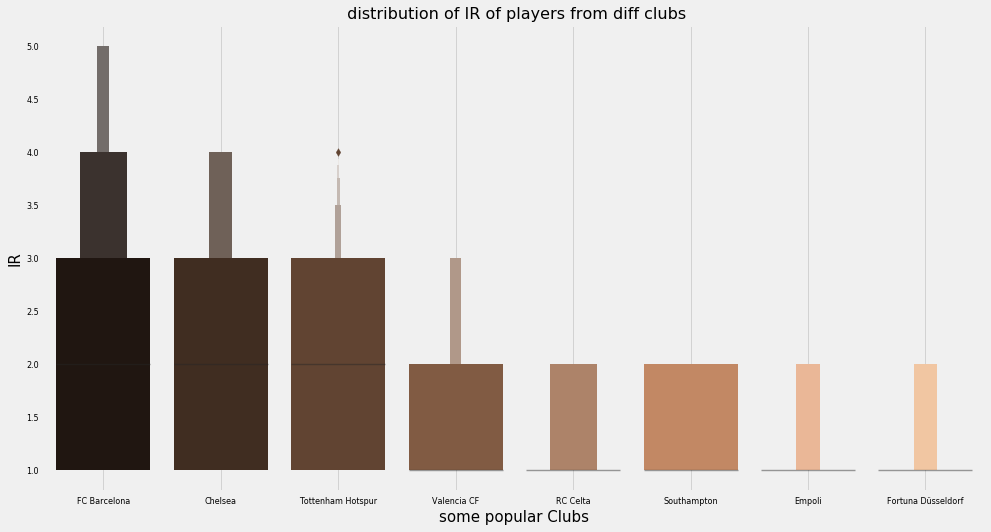

In [52]:
# club vs ir
some_clubs = ['CD leganès','Southampton','RC Celta','Empoli','Fortuna Düsseldorf','Manchestar City',
             'Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','real Madrid']
data_club = data.loc[data['Club'].isin(some_clubs)& data['International Reputation']]

plt.rcParams['figure.figsize']=(15,8)
ax = sns.boxenplot(x = data_club['Club'],y = data_club['International Reputation'],palette='copper')
ax.set_xlabel(xlabel = "some popular Clubs",fontsize=15)
ax.set_ylabel(ylabel ="IR",fontsize=15)
ax.set_title(label = " distribution of IR of players from diff clubs",fontsize=16)
plt.grid()
plt.show()

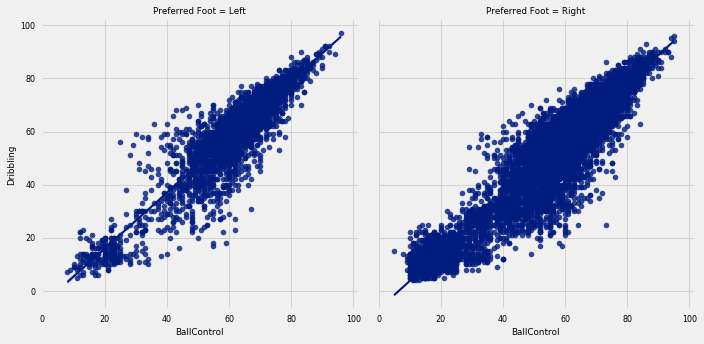

In [55]:
# comparing performance of left footed and right footed player
#ball control vs dribbling

sns.lmplot(x='BallControl',y = 'Dribbling',data=data,col='Preferred Foot')
plt.show()

# Query Analysis

Best players per each position with their age,club,nationality,based on their overall scores

In [58]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position','Name','Age','Club',
                 'Nationality','Overall']].sort_values(by='Overall',ascending = False).style.background_gradient(cmap='pink')

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


# Best player for each skill

In [59]:
# analyze skill of players
@interact
def skill(skills=['Defending','General','Mental','Passing','Mobility','Power','Rating','Shooting'],score=75):
    return data[data[skills]>score][['Name','Nationality','Club','Overall',skills]].sort_values(by=skills,
            ascending = False).head(20).style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

# make a function to get top 15 players from each club


In [60]:
# leta make interactive function to get list of top 15 players
@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country ][['Name','Position','Overall','Potential']].sort_values(
    by = 'Overall',ascending=False).head(15).style.background_gradient(cmap='magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [62]:
@interact
def club(club = list(data['Club'].value_counts().index[1:])):
    return data[data['Club'] == club ][['Name','Jersey Number','Position','Overall',
                    'Nationality','Age','Wage','Value','Contract Valid Until']].sort_values(
    by = 'Overall',ascending=False).head(15).style.background_gradient(cmap='inferno')

interactive(children=(Dropdown(description='club', options=('CD Leganés', 'Eintracht Frankfurt', 'Real Madrid'…

In [63]:
# findinf youngest players 
youngest = data[data['Age']==16][['Name','Age','Club','Nationality','Overall']]
youngest.sort_values(by='Overall',ascending = False).head().style.background_gradient(cmap='magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


In [66]:
# 15 eldest players

data.sort_values('Age',ascending=False)[['Name','Age','Club','Nationality','Overall']].head(15).style.background_gradient(cmap='Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [68]:
# longest membership oin club
now=datetime.datetime.now()
data['Join_year']=data.Joined.dropna().map(lambda x : x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x : now.year - int(x))).astype('int')
membership = data[['Name','Club','Years_of_member']].sort_values(by='Years_of_member',ascending=False).head(10)
membership.set_index('Name',inplace=True)
membership.style.background_gradient(cmap='inferno')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,29
M. Al Shalhoub,Al Hilal,22
H. Sogahata,Kashima Antlers,22
M. Ogasawara,Kashima Antlers,22
S. Narazaki,Nagoya Grampus,21
M. Wölfli,BSC Young Boys,20
K. Kitamoto,Vissel Kobe,20
C. Källqvist,BK Häcken,19
Y. Endo,Gamba Osaka,19


In [69]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column ='Years_of_member',club = ['FC Barcelona','Real Madrid','Chelsea'],membership=4):
    return data[(data[column]>membership)& (data['Club']==club)][['Name','Club','Years_of_member']].sort_values(
    by='Years_of_member',ascending=False).style.background_gradient(cmap='magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

In [70]:
# defining feature of player
player_feature=('Acceleration','Aggression','Agility','Balance','BallControl',
               'Composure','Crossing','Dribbling','FKAccuracy','Finishing',
               'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'
               ,'HeadingAccuracy','Interceptions','Jumping','LongPassing','LongShots',
               'Marking','Penalties')

#top 4 feature
for i,val in data.groupby(data['Position'])[player_feature].mean().iterrows():
    print('Position {}: {},{},{}'.format(i,*tuple(val.nlargest(4).index)))

Position CAM: Balance,Agility,Acceleration
Position CB: Jumping,Aggression,HeadingAccuracy
Position CDM: Aggression,Jumping,Balance
Position CF: Agility,Balance,Acceleration
Position CM: Balance,Agility,Acceleration
Position GK: GKReflexes,GKDiving,GKPositioning
Position LAM: Agility,Balance,Acceleration
Position LB: Acceleration,Balance,Agility
Position LCB: Jumping,Aggression,HeadingAccuracy
Position LCM: Balance,Agility,BallControl
Position LDM: Aggression,BallControl,LongPassing
Position LF: Balance,Agility,Acceleration
Position LM: Acceleration,Agility,Balance
Position LS: Acceleration,Agility,Finishing
Position LW: Acceleration,Agility,Balance
Position LWB: Acceleration,Agility,Balance
Position RAM: Agility,Balance,Acceleration
Position RB: Acceleration,Balance,Jumping
Position RCB: Jumping,Aggression,HeadingAccuracy
Position RCM: Agility,Balance,BallControl
Position RDM: Aggression,Jumping,BallControl
Position RF: Agility,Acceleration,Balance
Position RM: Acceleration,Agility,Ba

C:\Users\pooja\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


In [72]:
# top 10 left footerplayer
data[data['Preferred Foot'] == 'Left'][['Name','Age','Club','Nationality','Overall']].sort_values(
by='Overall',ascending=False).head(10).style.background_gradient(cmap='bone')

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


In [73]:
# top 10 right player
data[data['Preferred Foot'] == 'Right'][['Name','Age','Club','Nationality','Overall']].sort_values(
by='Overall',ascending=False).head(10).style.background_gradient(cmap='bone')

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90
